### CodSoft_*TASK-1: Titanic Survival Prediction*

**Problem Statement:** 
Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

**Dataset:** https://www.kaggle.com/datasets/yasserh/titanic-dataset 

#### Importing the Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Importing the Dataset/Data Collection

In [43]:
df = pd.read_csv('titanic_dataset.csv')

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.shape

(891, 12)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Data Preprocessing

#### Missing Values & Data Cleaning

In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
df = df.drop(columns = 'Cabin', axis = 1)

In [50]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [52]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#### Data Analysis

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Feature Selection

In [55]:
features = ['PassengerId','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

#### Data Visualization

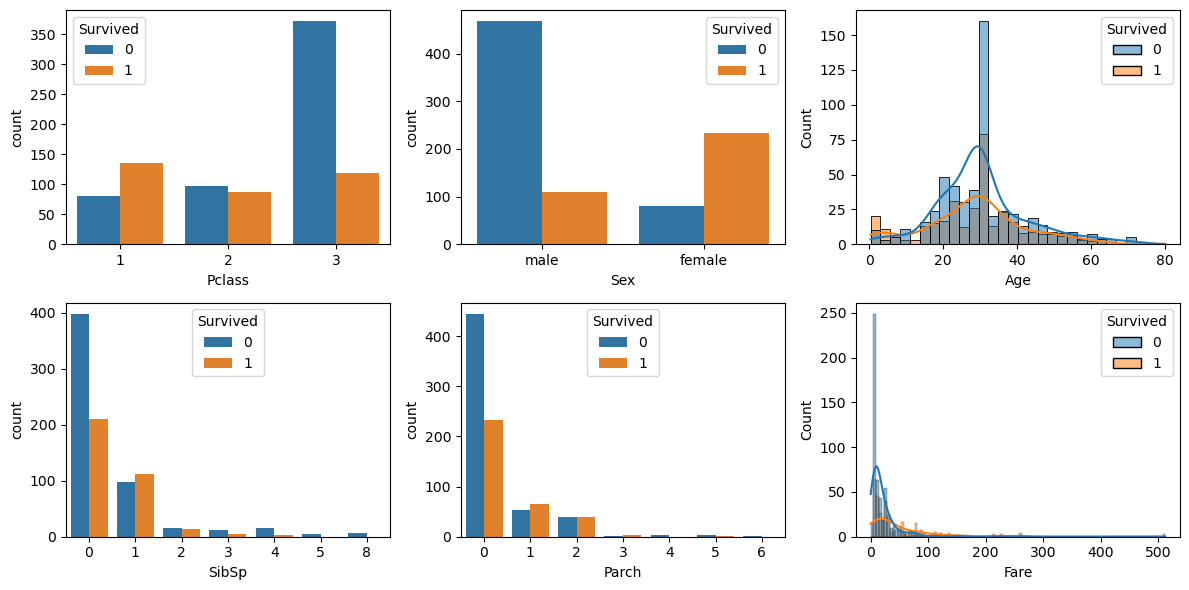

In [56]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.subplot(2, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.subplot(2, 3, 3)
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.subplot(2, 3, 4)
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.subplot(2, 3, 5)
sns.countplot(x='Parch', hue='Survived', data=df)
plt.subplot(2, 3, 6)
sns.histplot(x='Fare', hue='Survived', data=df, kde=True)
plt.tight_layout()
plt.show()

In [58]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [60]:
X = df[features]
Y = df[target]

In [62]:
# Train & Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

#### Model Selection & Training

In [63]:
model = LogisticRegression(random_state=2)

In [64]:
model.fit(X_train, Y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

#### Model Evaluation

In [65]:
X_pred = model.predict(X_train)

In [66]:
# Accuracy Score of Training Data

training_accuracy = accuracy_score(Y_train, X_pred)
print('Accuracy Score: ', training_accuracy)

Accuracy Score:  0.8117977528089888


In [67]:
X_test_pred = model.predict(X_test)

In [69]:
# Accuracy Score of Test Data

test_accuracy = accuracy_score(Y_test, X_test_pred)
print('Accuracy Score: ', test_accuracy)

Accuracy Score:  0.7653631284916201


#### Different Performance Metrics

In [72]:
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7653631284916201
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.80      0.62      0.70        79

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.77      0.76       179



#### Confusion Matrix

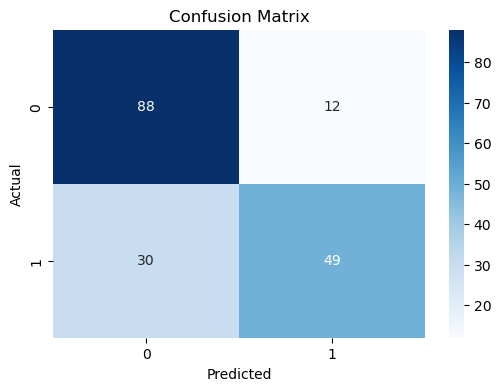

In [76]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()